In [1]:
import numpy as np
import operator, sys, os
import tensorflow as tf
import plotting
import itertools
import matplotlib
import collections
import random
import pandas as pd
import operator
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
from nltk.probability import FreqDist, MLEProbDist

In [2]:
action_map = pd.read_csv("actions_02.08.2018.csv")
action_map

,Unnamed: 0,action,qid,stage
0,0,open_1,0,open
1,1,open_2,1,open
2,2,open_3,2,open
3,3,open_4,3,open
4,4,open_5,4,open
5,5,ask_1,5,ask
6,6,ask_2,6,ask
7,7,ask_3,7,ask
8,8,ask_4,8,ask
9,9,ask_5,9,ask


In [3]:
class User:
    def __init__(self, user_class, item_class, action_map):
        self.name="Simulated-user"
        self.user_class = user_class
        self.item_class = item_class
        self.action_map = action_map
        print("---------------New User--------------------")
        if self.user_class == 0:
            uc_string = 'Young Adult'
        if self.user_class == 1:
            uc_string = "Middle Age"
        if self.user_class == 2:
            uc_string = "Old Age"
        if self.item_class == 0:
            ic_string = "Life"
        if self.item_class == 1:
            ic_string = "Car"            
        if self.item_class == 2:
            ic_string = "Dental"            
        if self.item_class == 3:
            ic_string = "Health"            
        if self.item_class == 4:
            ic_string = "Disability"
        print("ITEM CLASS :",ic_string)
        self.state = 0
        self.prev_response = 0
        self.action_map = pd.read_csv("actions_02.08.2018.csv")
        self.done = 0
        self.current_reward = 0
        self.allowed_actions = np.array([])
        
    def print_user_speech(self):
        if self.prev_response == 1:
            print("USER SAID YES")
        elif self.prev_response == 0:
            print("USER SAID NO")
            
    def get_allowed_actions(self):
  
        if (self.state == 0 ):
            self.allowed_actions = np.array(self.action_map[(self.action_map['stage']== 'open')]['qid'].values)
            return
        elif (self.state in [1,2,3,4,5]):
            self.allowed_actions = np.array(self.action_map[ (self.action_map['stage']== 'ask')]['qid'].values)
            return
        elif (self.state in [6,7,8,9,12]):
            self.allowed_actions = np.array(self.action_map[(self.action_map['stage']== 'close')]['qid'].values)
            return
        else:
            print("Dialog state is wrong or terminal state is reached. Current State while getting actions",self.state)
            self.allowed_actions = np.array([]) 
            return
    
    def get_reward(self):
        if (self.state == 10):
            self.current_reward = 1
            return
#         elif(self.state in [1,2,3,4,5]):
#             self.current_reward = 5
#             return
#         elif(self.state in [6,7,8,9,12]):
#             self.current_reward = 5
#             return
        elif(self.state == 11):
            self.current_reward = 0
            return
    def user_reset(self):
        self.state = 0
        self.prev_response = 0
        self.action_map = pd.read_csv("actions_02.08.2018.csv")
        self.done = 0
        self.current_reward = 0
        self.allowed_actions = np.array([])
        
    def is_done(self):
        if (self.state == 10):
            self.done = 1
            return
        elif (self.state == 11):
            self.done = 1
            return
        
    def respond(self,action):
        print("Bot Says : ",action_map[action_map['qid']==action]['action'].values)
        
        if (self.state == 0):
            self.get_allowed_actions()
            if (action == 0):
                self.prev_response = np.random.choice([1,0], p=[0.9,0.1])
                if self.prev_response:
                    self.state = 1
                else:
                    self.state = 11
            elif (action == 1):
                self.prev_response = np.random.choice([1,0], p=[0.1,0.9])  
                if self.prev_response:
                    self.state = 2
                else:
                    self.state = 11
            elif (action == 2):
                self.prev_response = np.random.choice([1,0], p=[0.5,0.5])
                if self.prev_response:
                    self.state = 3
                else:
                    self.state = 11
            elif (action == 3):
                self.prev_response = np.random.choice([1,0], p=[0.1,0.9])
                if self.prev_response:
                    self.state = 4
                else:
                    self.state = 11
            elif (action == 4):
                self.prev_response = np.random.choice([1,0], p=[0.9,0.1])
                if self.prev_response:
                    self.state = 5
                else:
                    self.state = 11
            else:
                print("Something wrong with chosen action",action)
            
            self.print_user_speech()
            self.get_reward()
            self.is_done()
            return
        
        if (self.state in [1,2,3,4,5]):
            self.get_allowed_actions()
            if (action == 5):
                self.prev_response = np.random.choice([1,0], p=[0.5,0.5])
                if self.prev_response:
                    self.state = 6
                else:
                    self.state = 11
            elif (action == 6):
                self.prev_response = np.random.choice([1,0], p=[0.9,0.1])  
                if self.prev_response:
                    self.state = 7
                else:
                    self.state = 11
            elif (action == 7):
                self.prev_response = np.random.choice([1,0], p=[0.1,0.9])
                if self.prev_response:
                    self.state = 8
                else:
                    self.state = 11
            elif (action == 8):
                self.prev_response = np.random.choice([1,0], p=[0.1,0.9])
                if self.prev_response:
                    self.state = 9
                else:
                    self.state = 11
            elif (action == 9):
                self.prev_response = np.random.choice([1,0], p=[0.9,0.1])
                if self.prev_response:
                    self.state = 12
                else:
                    self.state = 11
            else:
                print("Something wrong with chosen action")
            
            self.print_user_speech()
            self.get_reward()
            self.is_done()
            return
  
        
        if (self.state in [6,7,8,9,12]):
            self.get_allowed_actions()
            if (action == 10):
                self.prev_response = np.random.choice([1,0], p=[0.5,0.5])
                if self.prev_response:
                    self.state = 10
                else:
                    self.state = 11
            elif (action == 11):
                self.prev_response = np.random.choice([1,0], p=[0.9,0.1])  
                if self.prev_response:
                    self.state = 10
                else:
                    self.state = 11
            elif (action == 12):
                self.prev_response = np.random.choice([1,0], p=[0.1,0.9])
                if self.prev_response:
                    self.state = 10
                else:
                    self.state = 11
            elif (action == 13):
                self.prev_response = np.random.choice([1,0], p=[0.2,0.8])
                if self.prev_response:
                    self.state = 10
                else:
                    self.state = 11
            elif (action == 14):
                self.prev_response = np.random.choice([1,0], p=[0.9,0.1])
                if self.prev_response:
                    self.state = 10
                else:
                    self.state = 11
            else:
                print("Something wrong with chosen action")
            
            self.print_user_speech()
            self.get_reward()
            self.is_done()
            return

In [4]:
class Environment:
    def __init__(self):
        self.name="Chat-Environment"
        self.user = User(0,0,action_map)
        self.N_actions = len(self.user.action_map['qid'].values)
        print("No. actions:", self.N_actions)
        self.state_dim = len([self.user.state])
            
    def allowed_actions_with_prob(self, action_probs):
        allowed_action_prob_dict = {}
        self.user.get_allowed_actions()
        for action in self.user.allowed_actions:
            allowed_action_prob_dict[action] = action_probs[action]
        freq_dist = FreqDist(allowed_action_prob_dict)
        prob_dist = MLEProbDist(freq_dist)
        print("Allowed Actions",self.user.allowed_actions)
        print("Allowed Actions Prob Dict",allowed_action_prob_dict)
        return prob_dist, self.user.allowed_actions

        

    def reset(self):
        self.user = User(0,0,action_map)
        return np.array([self.user.state])
        
    def step(self, action):
        print("Bot said ",action)
        self.user.respond(action)
        return np.array([self.user.state]), self.user.done, self.user.current_reward


In [5]:
class PolicyEstimator():
    """
    Policy Function approximator. 
    """
    
    def __init__(self, learning_rate=0.001, scope="policy_estimator"):
        with tf.variable_scope(scope):
            self.state = tf.placeholder(tf.int32, [None,1], "state")
            self.action = tf.placeholder(dtype=tf.int32, name="action")
            self.target = tf.placeholder(dtype=tf.float32, name="target")

            self.state_one_hot = tf.one_hot(self.state, 13)
#             print("ONE HOT STATE", self.state_one_hot)
            self.output_layer = tf.layers.dense(tf.expand_dims(self.state_one_hot, 0), 
                                                env.N_actions, 
                                                kernel_initializer=tf.zeros_initializer())


#             self.h1 = tf.layers.dense(tf.expand_dims(self.state_one_hot, 0), 16, activation=tf.nn.relu, kernel_initializer=tf.zeros_initializer())
#             self.h2 = tf.layers.dense(self.h1, 32, activation=tf.nn.relu, kernel_initializer=tf.zeros_initializer())
#             self.h3 = tf.layers.dense(self.h2, 16, activation=tf.nn.relu, kernel_initializer=tf.zeros_initializer())
#             self.output_layer = tf.layers.dense(self.h3, env.N_actions, kernel_initializer=tf.zeros_initializer())
            self.action_probs = tf.squeeze(tf.nn.softmax(self.output_layer))
            self.picked_action_prob = tf.gather(self.action_probs, self.action)

            # Loss and train op
            self.loss = -tf.log(self.picked_action_prob) * self.target

            self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
            self.train_op = self.optimizer.minimize(
                self.loss, global_step=tf.train.get_global_step())
    
    def predict(self, state, sess=None):
        sess = sess or tf.get_default_session()
        return sess.run(self.action_probs, { self.state: state.reshape(1,1) })

    def update(self, state, target, action, sess=None):
        sess = sess or tf.get_default_session()
        feed_dict = { self.state: state.reshape(1,1), self.target: target, self.action: action}
        _, loss = sess.run([self.train_op, self.loss], feed_dict)
        return loss

In [6]:
class ValueEstimator():
    """
    Value Function approximator. 
    """
    
    def __init__(self, learning_rate=0.01, scope="value_estimator"):
        with tf.variable_scope(scope):
            self.state = tf.placeholder(tf.int32, [None,1], "state")
            self.target = tf.placeholder(dtype=tf.float32, name="target")


            
            self.state_one_hot = tf.one_hot(self.state, 13)
#             self.output_layer = tf.layers.dense(tf.expand_dims(self.state_one_hot, 0),
#                                                 1, 
#                                                 kernel_initializer=tf.zeros_initializer())

            self.h1 = tf.layers.dense(tf.expand_dims(self.state_one_hot, 0), 16, 
                                      activation=tf.nn.relu, kernel_initializer=tf.zeros_initializer())
            self.h2 = tf.layers.dense(self.h1, 32, activation=tf.nn.relu, 
                                      kernel_initializer=tf.zeros_initializer())
            self.h3 = tf.layers.dense(self.h2, 16, activation=tf.nn.relu, 
                                      kernel_initializer=tf.zeros_initializer())
            self.output_layer = tf.layers.dense(self.h3, 1, kernel_initializer=tf.zeros_initializer())



            self.value_estimate = tf.squeeze(tf.to_float(self.output_layer))
            self.loss = tf.squared_difference(self.value_estimate, self.target)

            self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
            self.train_op = self.optimizer.minimize(
                self.loss, global_step=tf.train.get_global_step())        
    
    def predict(self, state, sess=None):
        sess = sess or tf.get_default_session()
        return sess.run(self.value_estimate, { self.state: state.reshape(1,1) })

    def update(self, state, target, sess=None):
        sess = sess or tf.get_default_session()
        feed_dict = { self.state: state.reshape(1,1), self.target: target }
        _, loss = sess.run([self.train_op, self.loss], feed_dict)
        return loss

In [7]:
def actor_critic(env, estimator_policy, estimator_value, num_episodes, discount_factor=1.0):
    """
    Actor Critic Algorithm. Optimizes the policy 
    function approximator using policy gradient.
    
    Args:
        env: OpenAI environment.
        estimator_policy: Policy Function to be optimized 
        estimator_value: Value function approximator, used as a critic
        num_episodes: Number of episodes to run for
        discount_factor: Time-discount factor
    
    Returns:
        An EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """

    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes),
        episode_policy_loss=np.zeros(num_episodes),
        episode_value_loss=np.zeros(num_episodes))    
    
    Transition = collections.namedtuple("Transition", ["state", "action", "reward", "next_state", "done"])
    
    for i_episode in range(num_episodes):
        # Reset the environment and pick the fisrst action
        print("\n---------------Next Episode",i_episode," --------------------")
        state = env.reset()
        

        
        episode = []
        
        # One step in the environment
        for t in itertools.count():
            
            
            action_probs = estimator_policy.predict(state)
            print("All Action Probs",action_probs)
            allowed_action_dist, allowed_actions = env.allowed_actions_with_prob(action_probs)
#             expl_chance = np.random.choice([1,0], p=[0.4,0.6])
#             if (expl_chance == 1):
#                 action = np.random.choice(allowed_actions)
#             else:
            action = allowed_action_dist.generate()
#             action = np.random.choice(allowed_actions)
        
            next_state, done, reward = env.step(action)
            
            print("\nNew State",next_state)
            print("\nStep Rewards", reward)
            print("DONE?",done)

            
            # Keep track of the transition
            episode.append(Transition(
              state=state, action=action, reward=reward, next_state=next_state, done=done))
            
            # Update statistics
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            # Calculate TD Target
            value_next = estimator_value.predict(next_state)
            td_target = reward + discount_factor * value_next
            td_error = td_target - estimator_value.predict(state)
            
            # Update the value estimator
            v_loss = estimator_value.update(state, td_target)
            
            # Update the policy estimator
            # using the td error as our advantage estimate
            p_loss = estimator_policy.update(state, td_error, action)
            stats.episode_policy_loss[i_episode] += p_loss
            stats.episode_value_loss[i_episode] += v_loss
            # Print out which step we're on, useful for debugging.
            print("\rStep {} @ Episode {}/{} ({})".format(
                    t, i_episode , num_episodes, stats.episode_rewards[i_episode]), end="")

            if done:
                print("\nFinal Dialog State", env.user.state)
                print("---------------Episode DONE--------------------")
                break
                
            state = next_state
    
    return stats

In [20]:
tf.reset_default_graph()
env = Environment()

policy_estimator = PolicyEstimator()
value_estimator = ValueEstimator()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    stats = actor_critic(env, policy_estimator, value_estimator, 1, 0.95)

---------------New User--------------------
ITEM CLASS : Life
No. actions: 15

---------------Next Episode 0  --------------------
---------------New User--------------------
ITEM CLASS : Life
All Action Probs [0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667]
Allowed Actions [0 1 2 3 4]
Allowed Actions Prob Dict {0: 0.06666667, 1: 0.06666667, 2: 0.06666667, 3: 0.06666667, 4: 0.06666667}
Bot said  1
Bot Says :  ['open_2']
USER SAID NO

New State [11]

Step Rewards 0
DONE? 1


/Users/shishir/anaconda3/envs/BotconnectSalesAI/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:98: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Step 0 @ Episode 0/1 (0.0)
Final Dialog State 11
---------------Episode DONE--------------------


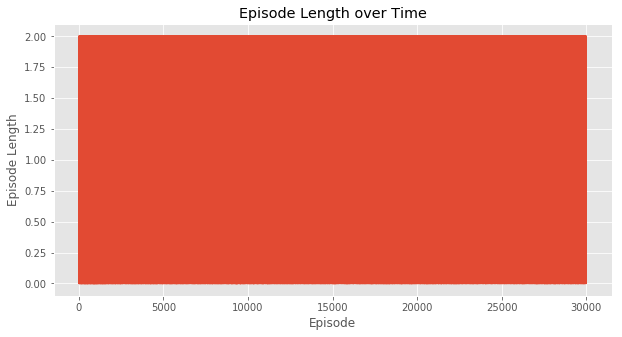

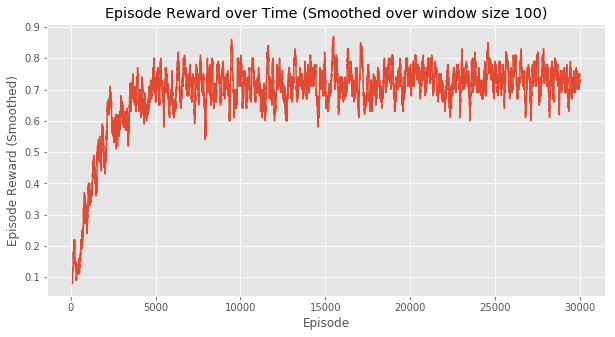

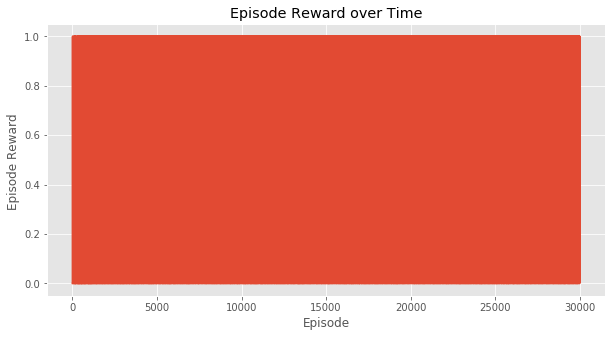

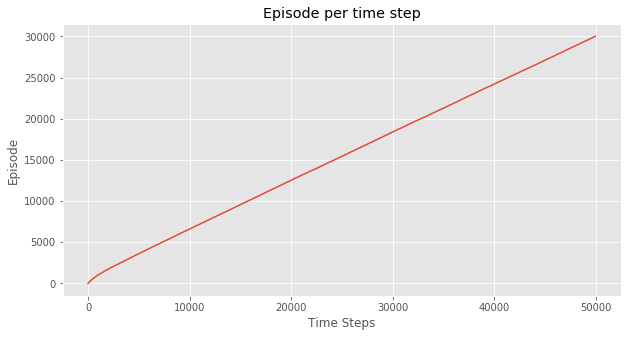

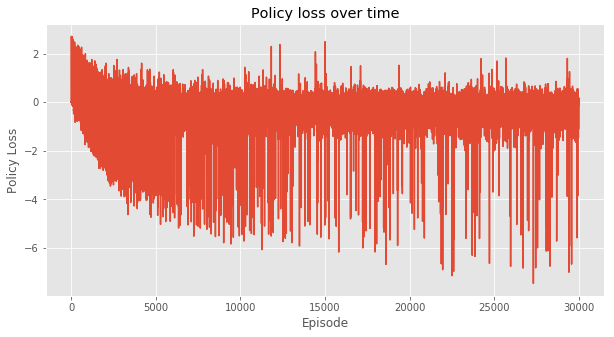

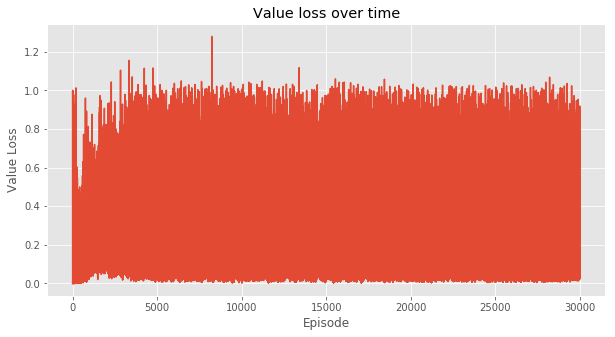

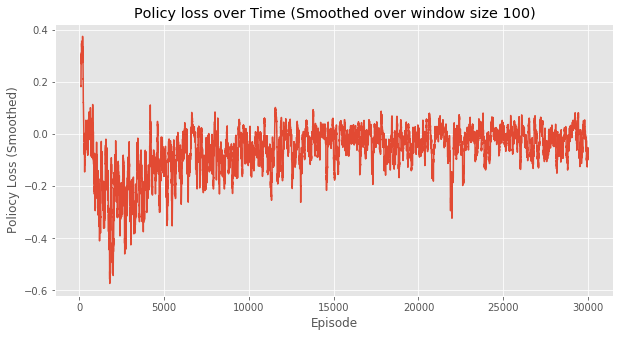

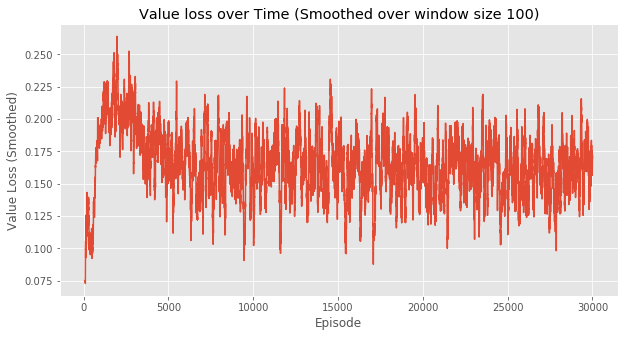

(<matplotlib.figure.Figure at 0x1a215194e0>,
 <matplotlib.figure.Figure at 0x1a216d9518>)

In [9]:
plotting.plot_episode_stats(stats, smoothing_window=100)

Text(0.5,1,'Episode Reward over Time')

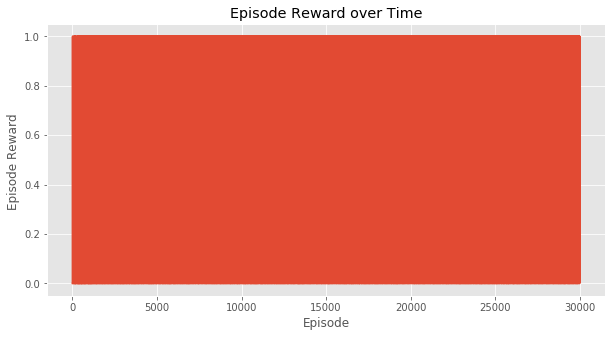

In [10]:
fig8 = plt.figure(figsize=(10,5))
plt.plot(stats.episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Episode Reward ")
plt.title("Episode Reward over Time")